Programa del metodo del Spline Sujeto, para modelar datos obtenidos experimentalmente 

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Funcion que retorna todos los coeficientes de los splines
def spline(x,y):

  #diccionario
  a = {k: v for k, v in enumerate(y)}
  n = len(x)
  h = {k: x[k+1]-x[k] for k in range(n-1)}

  A = [[2*h[0]]+[h[0]]+[0]*(n-2)]
  for i in range(1, n-1):
      row = [0]*n
      row[i-1] = h[i-1]
      row[i] = 2*(h[i-1]+h[i])
      row[i+1] = h[i]
      A.append(row)
  A.append([0]*(n-2)+[h[n-2]]+[2*h[n-2]])


  # derivada f'(x_0)
  df1=75
  # derivada f'(x_n)
  dfn=72
  B = [3*(a[1]-a[0])/h[0]-3*df1]
  for k in range(1,n-1):
      row = 3*(a[k+1]-a[k])/h[k]-3*(a[k]-a[k-1])/h[k-1]
      B.append(row)
  B.append(3*dfn-(3*(a[n-1]-a[n-2])/h[n-2]))


  # valores de c0 c1 c3 c3 en diccionario
  c = dict(zip(range(n), np.linalg.solve(A,B)))

  # para las constantes de b_i y d_i
  b = {}
  d = {}
  for k in range(n-1):
    b[k] = (1/h[k]) * (a[k+1]-a[k]) - (h[k]/3) * (2*c[k]+c[k+1])
    d[k] = (c[k+1]-c[k])/(3*h[k])

  # devuelve todos los los splines S_i
  s ={}
  for k in range(n-1):
    eq = f'{a[k]}{b[k]:+}*(x-{x[k]}){c[k]:+}*(x-{x[k]})**2{d[k]:+}*(x-{x[k]})**3'
    s[k] ={'eq': eq, 'dominio': [x[k], x[k+1]]}

  return s

Ingresamos los datos de $x$ y $y$ e invocamos a la funcion *spline*

Retorna los polinomios en forma de diciconario:

In [3]:
# Datos del ejercicio
x = [0, 3, 5, 8, 13]
y = [0, 225, 383, 623, 993]
eqs = spline(x,y)
print(eqs)

{0: {'eq': '0+75.0*(x-0)-0.65929203539823*(x-0)**2+0.21976401179941002*(x-0)**3', 'dominio': [0, 3]}, 1: {'eq': '225+76.97787610619469*(x-3)+1.31858407079646*(x-3)**2-0.15376106194690262*(x-3)**3', 'dominio': [3, 5]}, 2: {'eq': '383+80.40707964601769*(x-5)+0.39601769911504425*(x-5)**2-0.1772369714847591*(x-5)**3', 'dominio': [5, 8]}, 3: {'eq': '623+77.99778761061947*(x-8)-1.1991150442477876*(x-8)**2+0.07991150442477876*(x-8)**3', 'dominio': [8, 13]}}


graficamos los los polinomios continuas

{0: {'eq': '0+75.0*(x-0)-0.65929203539823*(x-0)**2+0.21976401179941002*(x-0)**3', 'dominio': [0, 3]}, 1: {'eq': '225+76.97787610619469*(x-3)+1.31858407079646*(x-3)**2-0.15376106194690262*(x-3)**3', 'dominio': [3, 5]}, 2: {'eq': '383+80.40707964601769*(x-5)+0.39601769911504425*(x-5)**2-0.1772369714847591*(x-5)**3', 'dominio': [5, 8]}, 3: {'eq': '623+77.99778761061947*(x-8)-1.1991150442477876*(x-8)**2+0.07991150442477876*(x-8)**3', 'dominio': [8, 13]}}


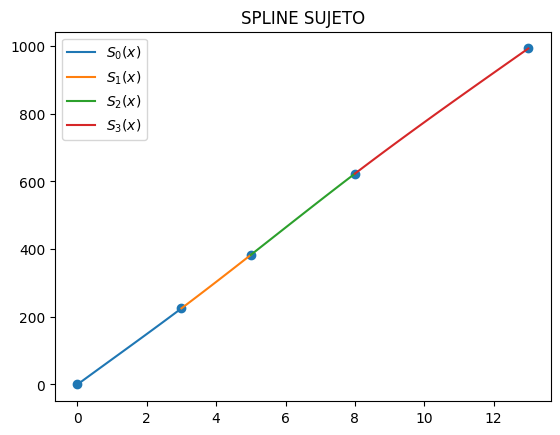

In [7]:

#Para graficar los splines en sus respectivos intervalos
for key, value in eqs.items():
  def p(x):
    return eval(value['eq'])
  t = np.linspace(*value['dominio'], 100)
  plt.plot(t, p(t), label=f"$S_{key}(x)$")
plt.title('SPLINE SUJETO')
plt.scatter(x,y)
plt.legend()
plt.show()